In [9]:
# import usual suspects

%matplotlib inline
import pandas as pd
import numpy as np
from numpy import arange
import math

import seaborn as sns
sns.set_style("white")

import scipy as sp
from scipy import linalg, optimize

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import collections
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from matplotlib.dates import DateFormatter

import calendar
import datetime as dt
fromtimestamp = dt.datetime.fromtimestamp

In [10]:
# import cleaned ufo datasets 

ufoweekly = pd.read_csv('../Data/Datasets/cleandate_weekly_reval.csv',index_col = 0)
ufoyearly = pd.read_csv('../Data/Datasets/yearly_ufopct_entrtm.csv',index_col = 0)
ufo = pd.read_csv('../Data/ufo_clean.csv', index_col = 0)

In [11]:
# to plot ufo weekly: assign week and year cols, sort and update df

ufoweekly['year'] = pd.to_datetime(ufoweekly['week_id'].astype(str).str[:4]).dt.year
ufoweekly['week_of_year'] = ufoweekly['week_id'].astype(str).str[-2:].astype(int)
ufoweekly['week_of_year'] = np.abs(ufoweekly['week_of_year'])

In [17]:
# sort vals, update and review df

ufoweekly = ufoweekly.sort_values(['startdateweek'])

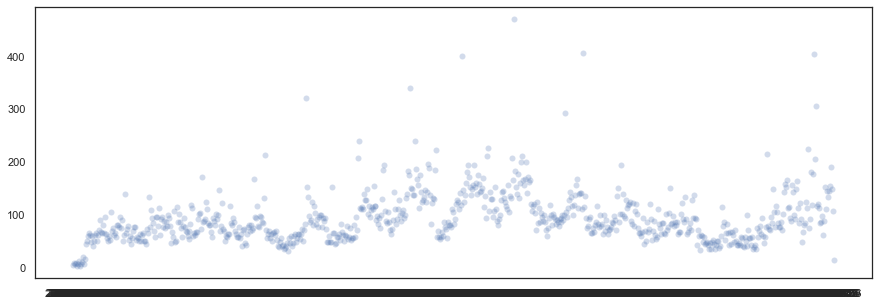

In [13]:
# plot5_1: weekly ufo count - scatter

sns.set(style="white")
sns.cubehelix_palette(start=.5, rot=-.5)

fig, ax = plt.subplots(figsize=(15,5))
  
fig1 = plt.scatter(ufoweekly.startdateweek, ufoweekly.weekly_ufocount, alpha=0.25, linewidths=0)
   
#ax.fmt_xdata = DateFormatter('%Y-%w')

#fig.autofmt_xdate()

plt.show()

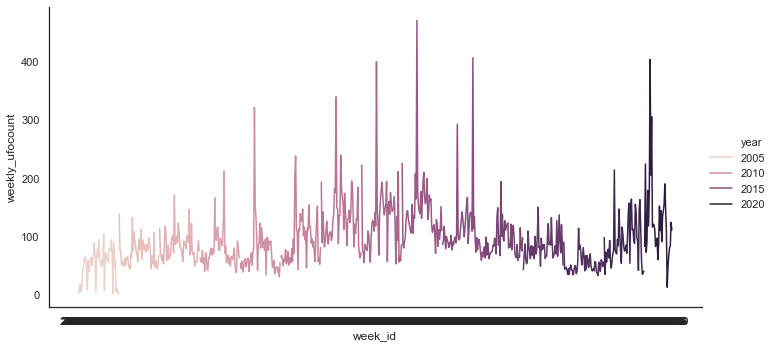

In [14]:
# plot5_1 - weekly ufo counts all time

sns.relplot(x="week_id", y="weekly_ufocount", hue="year", kind="line", data=ufoweekly, aspect=12/6);

ufoweekly =ufoweekly.reset_index()
ufoweekly = ufoweekly.drop(0)
ufoweekly = ufoweekly.drop(765)

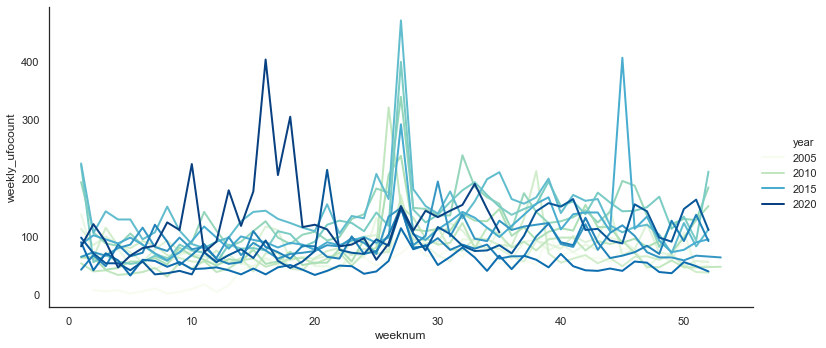

In [15]:
# plot 5_3 weekly-ufos per years for weeksofyear

sns.set_context(font_scale=3, rc={"lines.linewidth": 2})
sns.relplot(x="weeknum", y="weekly_ufocount", hue="year", kind="line", data=ufoweekly, aspect=15/7,palette='GnBu');

In [32]:
# making a copy df to plot, sort, reset_index and update

weekplotdf2 = ufoweekly.copy()
weekplotdf2 = weekplotdf2.sort_values('week_id').reset_index()

# only interesting years
chosenyears = [2006,2010,2015,2020]
dfyears = pd.DataFrame(weekplotdf2.loc[weekplotdf2['year'].isin(chosenyears)])
dfyears.head()

#dfyears.value_counts()
#weekplotdf2.dtypes

plotlabels = [x for x in dfyears['year'].unique()]
plotlabels

[2006, 2010, 2015, 2020]

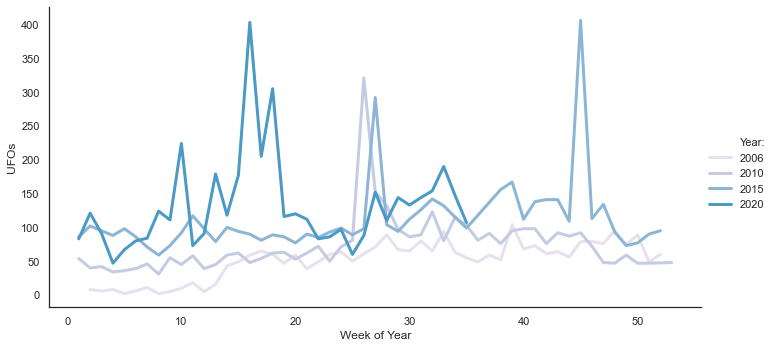

In [84]:
# plot5-4a: only choosen years

palt = sns.color_palette("PuBuGn")[:-2]

p54 = sns.relplot(x="weeknum", y="weekly_ufocount", hue="year", kind="line", data=dfyears, aspect=20/10,palette=palt);

p54.set(xlabel = 'Week of Year', ylabel = 'UFOs')

# replace labels
new_labels = ['Year:',"2006",'2010','2015','2020']

for t, l in zip(p54._legend.texts, new_labels): t.set_text(l)


In [82]:
# nice palette of aqua greens:

elp = [(0.8682814302191465, 0.9488811995386389, 0.8476585928489042),
 (0.7590311418685122, 0.9056362937331796, 0.7543406382160708),
 (0.5847750865051903, 0.8386928104575164, 0.7344867358708189),
 (0.37993079584775086, 0.7430988081507113, 0.8027681660899654)]

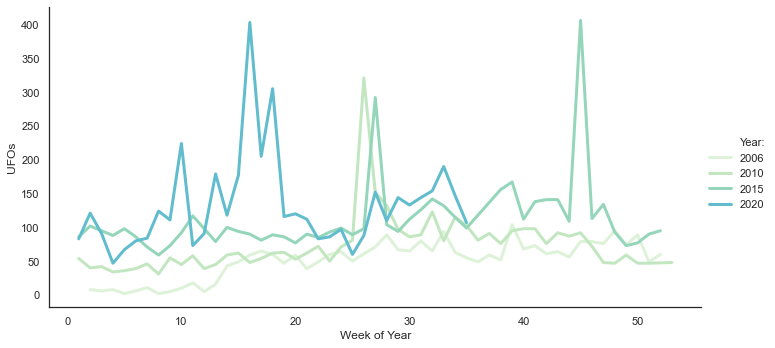

In [85]:
# plot5-4b: only choosen years

palt = sns.color_palette("PuBuGn")[:-2]

p54 = sns.relplot(x="weeknum", y="weekly_ufocount", hue="year", kind="line", data=dfyears, aspect=20/10,palette=elp);

p54.set(xlabel = 'Week of Year', ylabel = 'UFOs')

# replace labels
new_labels = ['Year:',"2006",'2010','2015','2020']

for t, l in zip(p54._legend.texts, new_labels): t.set_text(l)
